In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
X = pd.read_csv('weather.csv')

In [33]:
X.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [34]:
X['RainTomorrow']=X.RainTomorrow.replace({'No':-1, 'Yes': 1})
X['RainToday']=X.RainToday.replace({'No':-1, 'Yes': 1})
del X['Unnamed: 0']

In [35]:
X.corr(method='pearson')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.056185,0.083936
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.228884,-0.159237
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.239032
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.187975,-0.119285
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.330635,-0.450768
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.155490,0.234010
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.102267,0.090995
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.080074,0.087817
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.353358,0.257161
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.378766,0.446160


In [36]:
sns.heatmap(X.corr())

<IPython.core.display.Javascript object>

<AxesSubplot:>

In [37]:
X.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [38]:
total_count = X.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 142193


In [39]:
num_cols = []
more_empty=[]

for col in X.columns:
    # Количество пустых значений 
    temp_null_count = X[X[col].isnull()].shape[0]
    dt = str(X[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        if temp_perc>20.0:
            more_empty.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MinTemp. Тип данных float64. Количество пустых значений 637, 0.45%.
Колонка MaxTemp. Тип данных float64. Количество пустых значений 322, 0.23%.
Колонка Rainfall. Тип данных float64. Количество пустых значений 1406, 0.99%.
Колонка Evaporation. Тип данных float64. Количество пустых значений 60843, 42.79%.
Колонка Sunshine. Тип данных float64. Количество пустых значений 67816, 47.69%.
Колонка WindGustSpeed. Тип данных float64. Количество пустых значений 9270, 6.52%.
Колонка WindSpeed9am. Тип данных float64. Количество пустых значений 1348, 0.95%.
Колонка WindSpeed3pm. Тип данных float64. Количество пустых значений 2630, 1.85%.
Колонка Humidity9am. Тип данных float64. Количество пустых значений 1774, 1.25%.
Колонка Humidity3pm. Тип данных float64. Количество пустых значений 3610, 2.54%.
Колонка Pressure9am. Тип данных float64. Количество пустых значений 14014, 9.86%.
Колонка Pressure3pm. Тип данных float64. Количество пустых значений 13981, 9.83%.
Колонка Cloud9am. Тип данных float

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [41]:
strategies=['mean', 'median', 'most_frequent']
for coll in more_empty:
    for i in range(3):
        
        print(test_num_impute_col(X, coll, strategies[i]))

('Evaporation', 'mean', 60843, 5.469824216349109, 5.469824216349109)
('Evaporation', 'median', 60843, 4.8, 4.8)
('Evaporation', 'most_frequent', 60843, 4.0, 4.0)
('Sunshine', 'mean', 67816, 7.624853113193594, 7.624853113193594)
('Sunshine', 'median', 67816, 8.5, 8.5)
('Sunshine', 'most_frequent', 67816, 0.0, 0.0)
('Cloud9am', 'mean', 53657, 4.437189391885787, 4.437189391885787)
('Cloud9am', 'median', 53657, 5.0, 5.0)
('Cloud9am', 'most_frequent', 53657, 7.0, 7.0)
('Cloud3pm', 'mean', 57094, 4.503166899728551, 4.503166899728551)
('Cloud3pm', 'median', 57094, 5.0, 5.0)
('Cloud3pm', 'most_frequent', 57094, 7.0, 7.0)


In [42]:
del X['Evaporation']
del X['Sunshine']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
 

y = X["RainTomorrow"]
X = X.drop(columns=["RainTomorrow"])
numeric_data = X.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X = X.fillna(numeric_data_mean)
categorical = list(X.dtypes[X.dtypes == "object"].index)
X[categorical] = X[categorical].fillna("NotGiven")
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])
X=column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

 
for i, n_neighbors in enumerate([2, 5, 20, 50]):
    pipeline = Pipeline(steps=[
    
    ('classifier', KNeighborsClassifier(n_neighbors=n_neighbors))
])
    model = pipeline.fit(X_train, y_train)
    #ax = fig.add_subplot(gs[i])
    #plot_decision_regions(X_test, Y_test, model, ax=ax)
    
    print('_'*30)
    print(f'k={n_neighbors}')
    print(classification_report(y_test, model.predict(X_test)))

______________________________
k=2
              precision    recall  f1-score   support

          -1       0.83      0.96      0.89     33061
           1       0.72      0.33      0.45      9597

    accuracy                           0.82     42658
   macro avg       0.78      0.65      0.67     42658
weighted avg       0.81      0.82      0.79     42658

______________________________
k=5
              precision    recall  f1-score   support

          -1       0.86      0.94      0.90     33061
           1       0.70      0.49      0.58      9597

    accuracy                           0.84     42658
   macro avg       0.78      0.72      0.74     42658
weighted avg       0.83      0.84      0.83     42658

______________________________
k=20
              precision    recall  f1-score   support

          -1       0.85      0.96      0.91     33061
           1       0.78      0.43      0.55      9597

    accuracy                           0.84     42658
   macro avg       0.8

In [53]:
from sklearn.model_selection import GridSearchCV
classifier=KNeighborsClassifier()

In [54]:
model=GridSearchCV(estimator=classifier,param_grid={'n_neighbors':[2,4,5,10,15]},cv=3,scoring='f1',verbose=4,n_jobs=-1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 5, 10, 15]}, scoring='f1',
             verbose=4)

In [55]:
best_parameters = model.best_params_ 
print(best_parameters) 


{'n_neighbors': 2}


In [56]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,  y_train)

KNeighborsClassifier(n_neighbors=2)

In [57]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.83      0.96      0.89     33061
           1       0.72      0.33      0.45      9597

    accuracy                           0.82     42658
   macro avg       0.78      0.65      0.67     42658
weighted avg       0.81      0.82      0.79     42658



In [58]:
print("Правильность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

Правильность на тестовом наборе: 0.82


In [59]:
from sklearn.model_selection import KFold, cross_validate
scoring=('f1', 'accuracy','precision','recall')
n_splits = 3
kf = KFold(n_splits=n_splits)
cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=False)
cv_results

{'fit_time': array([0.01451445, 0.01759148, 0.0211122 ]),
 'score_time': array([106.5676918 , 104.81770134, 105.2933774 ]),
 'test_f1': array([0.44779756, 0.44504421, 0.43908819]),
 'test_accuracy': array([0.82241779, 0.82027247, 0.81903671]),
 'test_precision': array([0.71548368, 0.73591874, 0.72285451]),
 'test_recall': array([0.32587642, 0.31897012, 0.31530927])}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
 
def linear_weights(distance):
    k = distance.shape[1]
    return ((k - np.arange(0, k))/k) * np.ones_like(distance)
param = { 'n_neighbors': [2,5,8,10,20]
         }
rnd_search = RandomizedSearchCV(estimator=classifier,param_distributions = param,n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
rnd_search.fit(X_train,y_train)
rnd_search.best_params_
rnd_search.best_score_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


nan

In [62]:
rnd_search.best_params_

{'n_neighbors': 2}

In [68]:
y_train.value_counts()

-1    77255
 1    22280
Name: RainTomorrow, dtype: int64

In [70]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test,model.predict(X_test)))

0.646536944252486


In [71]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [73]:
proba=model.predict_proba(X_test)
 


In [78]:
true_proba_target1_1 = proba[:,1]
true_proba_target1_1

array([0. , 0. , 0. , ..., 0. , 0.5, 0. ])

In [77]:
proba.shape

(42658, 2)

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.03650827, 0.20549893, 1.        ]),
 array([0.        , 0.32958216, 0.6890695 , 1.        ]),
 array([2. , 1. , 0.5, 0. ]))

In [81]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<IPython.core.display.Javascript object>


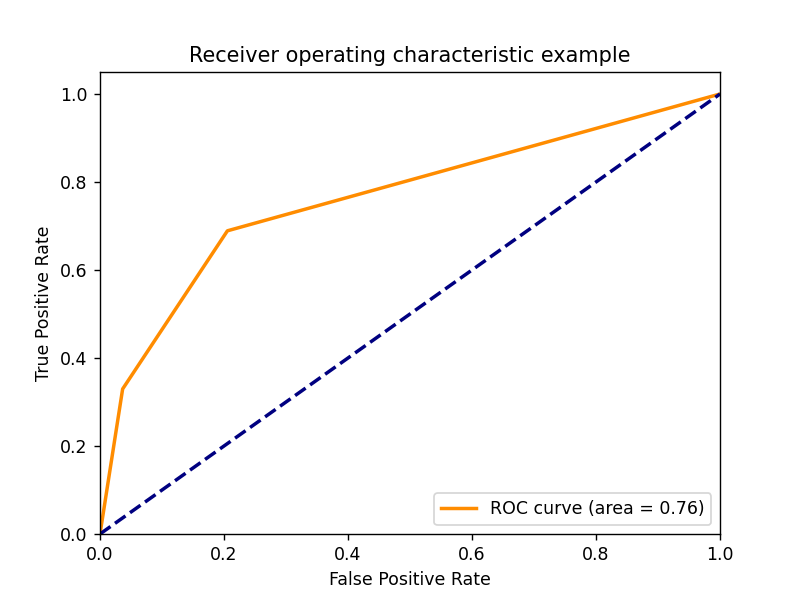

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
draw_roc_curve(y_test, true_proba_target1_1, pos_label=1, average='micro')